Імпортую бібліотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Зчитую дані

In [3]:
digits = load_digits()

Виводжу опис набору даних

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Виводжу значення target кожного 100-го зразка

In [6]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.target.shape

(1797,)

Двомірний масив, що представляє зображення зразка з інденксом 13

In [9]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

Виводжу перші 24 цифри з набору

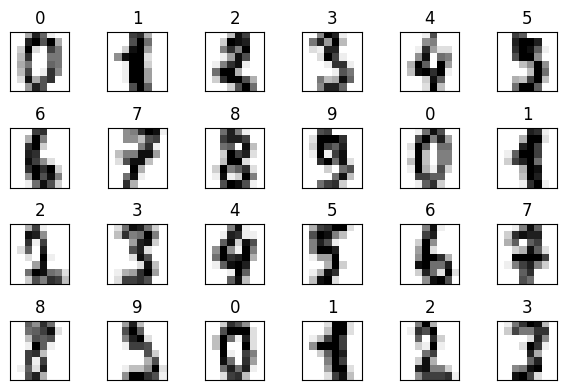

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)

plt.tight_layout()

Виводжу перші 36 цифр з набору

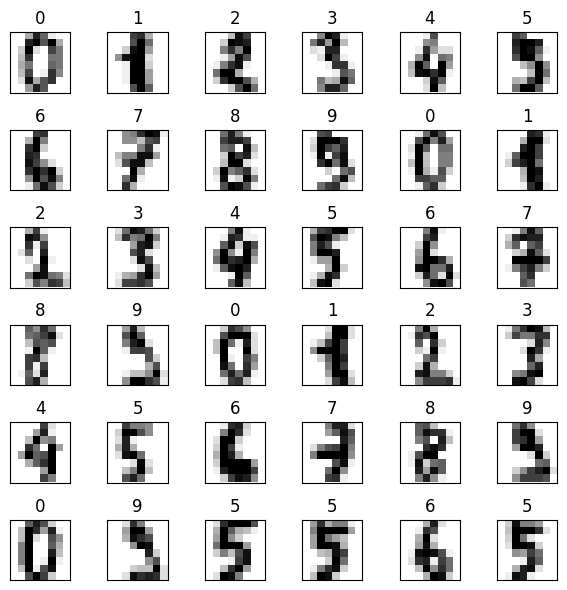

In [13]:
figure, axes = plt.subplots(nrows=6, ncols=6, figsize=(6, 6))
for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)

plt.tight_layout()

Розділяю дані на навчальні та тестові

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.2)

Створюю об'єкт оцінювача для алгоритму k найближчих сусідів

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Виконую прогнозування класів

In [18]:
predicted = knn.predict(X=X_test)
expected = y_test

Порівнюю прогнозовані цифри з очікуваними для перших 20, 24, 36 зразків

In [19]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [20]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [21]:
predicted[:24]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6])

In [22]:
expected[:24]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6])

In [23]:
predicted[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

In [24]:
expected[:36]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6, 9, 6,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5])

Виводжу оцінку результатів через метод score

In [25]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


Матриця невідповідностей

In [26]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [27]:
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

Виводжу звіт класифікації

In [28]:
names = [str(digit) for digit in digits.target_names]

In [29]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



8. Використайте декілька моделей KNeighborsClassifier, SVC і GaussianNB для пошуку найкращої.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB()
}

In [32]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

    confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(f"Confusion matrix for {model_name}:\n{confusion}\n")

Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      0.97      0.99        39
           3       1.00      0.95      0.97        41
           4       0.95      0.90      0.92        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.87      0.94      0.91        36
           8       0.92      1.00      0.96        34
           9       0.97      0.92      0.94        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion matrix for KNeighborsClassifier:
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  1  0]
 [ 0  0  0 39  0  1  0  0  1  0]
 [ 0  0  0  0 37  0  0  4  0  0]
 [ 0 

9. Налаштуйте гіперпараметр K в KNeighborsClassifier

In [33]:
k_values = range(1, 16)
best_score = 0
best_k = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"k = {k}, Accuracy = {score:.2%}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"Найкраще значення k: {best_k} з точністю {best_score:.2%}")

k = 1, Accuracy = 96.67%
k = 2, Accuracy = 96.94%
k = 3, Accuracy = 96.67%
k = 4, Accuracy = 96.94%
k = 5, Accuracy = 96.67%
k = 6, Accuracy = 96.11%
k = 7, Accuracy = 96.39%
k = 8, Accuracy = 96.67%
k = 9, Accuracy = 96.11%
k = 10, Accuracy = 96.11%
k = 11, Accuracy = 96.39%
k = 12, Accuracy = 95.28%
k = 13, Accuracy = 95.28%
k = 14, Accuracy = 95.00%
k = 15, Accuracy = 94.72%
Найкраще значення k: 2 з точністю 96.94%


In [34]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print("Classification report for the best k:")
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(f"Confusion matrix for the best k ({best_k}):\n{confusion}\n")

Classification report for the best k:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        37
           2       0.97      0.97      0.97        39
           3       0.95      0.98      0.96        41
           4       0.97      0.93      0.95        41
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        30
           7       0.92      0.97      0.95        36
           8       0.94      0.94      0.94        34
           9       0.97      0.92      0.94        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Confusion matrix for the best k (2):
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  1  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  1  0]
 [ 0  0  1  0 38  0  0  2  0  0]
 